In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-13 10:53:17.641210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 10:53:17.662025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 10:53:17.668396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 10:53:17.683646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 10:53:19.571220: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
933,RF-SPUD,Parkinsons,turn,0.3,"{'knn': 828, 'OD_method': 'default', 'agg_meth...","{'42': -0.20307813512740913, '1738': -0.230830...","{'42': 9.416025350837482e-06, '1738': 8.546853...","{'42': -0.05204397878092526, '1738': -0.040235...","{'42': -0.0073847567644218515, '1738': -0.0361...","{'42': -0.006652292663005044, '1738': -0.00492...","{'42': 0.9888654125853318, '1738': 1.010199189...","{'42': 0.9892251081391211, '1738': 1.025789441...","{'42': {'RF-OOB': -0.04902217670064002, 'KNN':...",{}
2345,RF-SPUD,Cancer_Data,distort,0.3,"{'knn': 38, 'OD_method': 'mean', 'agg_method':...","{'42': 0.8101933216168717, '1738': 0.681898066...","{'42': 0.00020385407754485563, '1738': 0.00013...","{'42': 0.7846153846153846, '1738': 0.859340659...","{'42': 0.7631578947368421, '1738': 0.850877192...","{'42': 0.7631578947368421, '1738': 0.877192982...","{'42': 0.7531820952873584, '1738': 0.874987693...","{'42': 0.7480822308936899, '1738': 0.840713853...","{'42': {'RF-OOB': 0.9681318681318681, 'KNN': 0...",{}
899,SPUD,IstanbulStock,turn,0.3,"{'knn': 24, 'OD_method': 'default', 'agg_metho...","{'42': 0.4297297591826922, '1738': 0.429729759...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.5019743854596939, '1738': 0.474425916...","{'42': 0.5433686994667671, '1738': 0.633130113...","{'42': 0.550640968421743, '1738': 0.5499112266...","{'42': 0.7499076573923471, '1738': 0.746395043...","{'42': 0.7559514242310723, '1738': 0.673869327...","{'42': {'RF-OOB': 0.47544342318601107, 'KNN': ...","{'knn': 0.24574793813965587, 'OD_method': 0.18..."
2300,SPUD,seeds,even,0.3,"{'knn': 38, 'OD_method': 'mean', 'agg_method':...",{'42': 0.5728643216080402},{'42': 7.57556627357895e-05},{'42': 0.8584905660377359},{'42': 0.825},{'42': 0.85},{'42': 0.8555326435441561},{'42': 0.8326972549583214},"{'42': {'RF-OOB': 0.9150943396226415, 'KNN': 0...","{'knn': 0.08258379294229026, 'OD_method': 0.02..."
1570,NAMA,tic-tac-toe,random,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': 0.615866388308977, '1738': 0.5741127348...","{'42': 0.0653512231902755, '1738': 0.058516132...","{'42': 0.70822454308094, '1738': 0.75195822454...","{'42': 0.7265625, '1738': 0.7421875, '5271': 0...","{'42': 0.7421875, '1738': 0.6380208333333334, ...","{'42': 0.7258490884048739, '1738': 0.624277292...","{'42': 0.6864026963468849, '1738': 0.705119814...","{'42': {'RF-OOB': 0.7134464751958225, 'KNN': 0...","{'OD_method': 0.0307933194154488, 'agg_method'..."


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


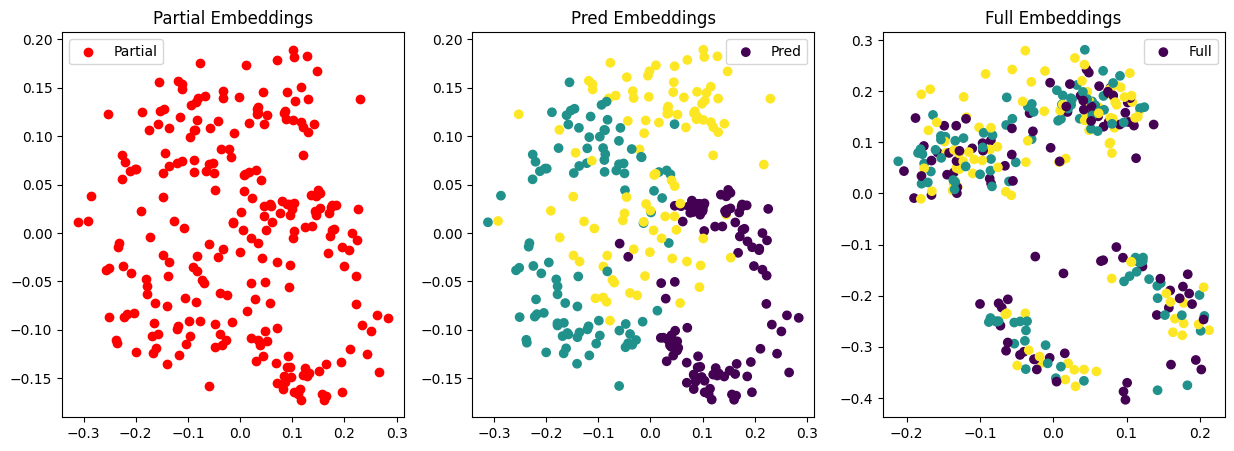

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

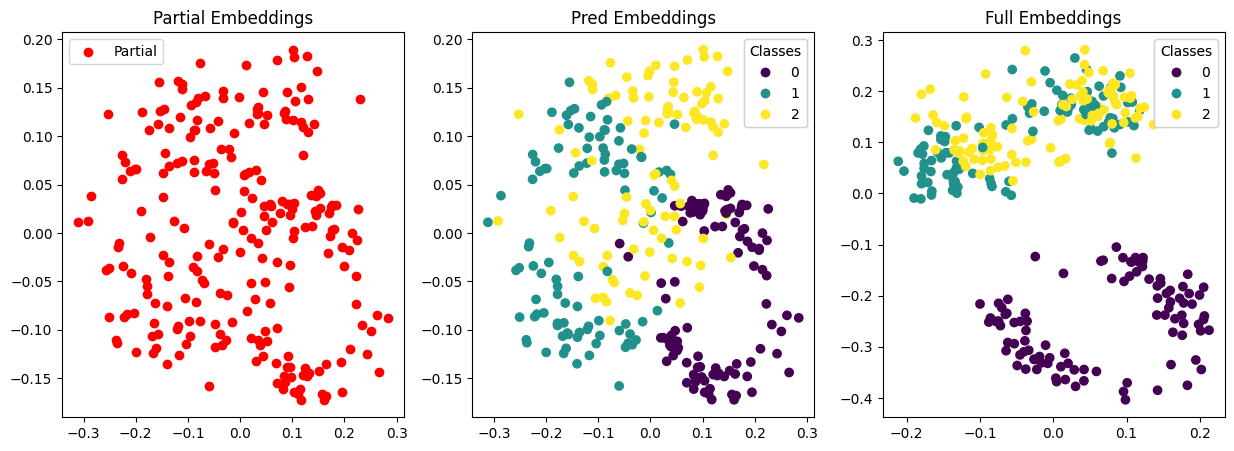

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


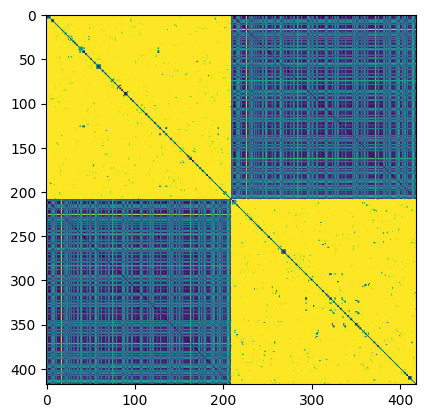

In [8]:
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
print(tasks[0])
plt.imshow(block_full)

# Marshall's Tests here?

In [ ]:
#Unpack all the code and run the mantel test
r_obs, p_value, perm_r = mantel_test(*iris_task, plot = True)

Results already exist for SPUD, iris, turn.


UnboundLocalError: local variable 'perm_r' referenced before assignment

<Figure size 1000x600 with 0 Axes>

In [11]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=len(tasks))): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[:5]
        )



2025-01-13 10:54:17.971767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 10:54:17.989547: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 10:54:17.994955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 10:54:18.008253: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 10:54:19.744170: W tensorflow/compiler/tf

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-MASH_ComputerHardware_turn.json


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-MASH_ComputerHardware_distort.json


  0%|          | 5/2222 [00:39<4:52:27,  7.92s/it]


ValueError: x and y must have length at least 2.

# Marshall's Vizualizations Here?